### **Install and import the libraries for visualisations**

In [29]:
!pip install hvplot

In [30]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.offline import iplot
import plotly.graph_objects as go
from IPython.display import display
import hvplot.pandas
import holoviews as hv
import panel as pn
import math
from google.colab import files

pn.extension(comms='colab')

### **Read in the data of the company's 40 venues daily visitors**

In [32]:
daily_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueDailyVisitors.csv', index_col=0)
daily_visitors.index = pd.to_datetime(daily_visitors.index)

print('The first 5 rows of dataset\n', daily_visitors.head(),'\n')
print('The last 5 rows of dataset\n', daily_visitors.tail(), '\n')
print('The statistical values of each venue\n', daily_visitors.describe(),'\n')
print('The maximum visitors of each day\n', daily_visitors.max(axis=1),'\n')
print('\nThe minimum visitors of each day\n', daily_visitors.min(axis=1),'\n')
print('\nThe average visitors of each day\n',daily_visitors.mean(axis=1))

The first 5 rows of dataset
             AWF  WFI  SPF  CQC  TRV  YXF  WRL  XJT  BKI  TLJ  VRD  XFP  PDT  \
Date                                                                          
2019-01-01  186  105  512  192   76   74   77   87    0   84   70   69  275   
2019-01-02  152   76  614  192   68   70   90   73    0  105   57   64  315   
2019-01-03   97   85  537  116   75   78   80   70    0   68   56   68  175   
2019-01-04   80   70  292  126   82   68   90   54    0   65   63   74  225   
2019-01-05  105   79  300  132   80   73   82   94    0   77   60   65  268   

            ZFX  YRU  WXV  ZLH  GLQ  SJU  BQV  DKS  CWN  VLS  XXO  BEY  YVW  \
Date                                                                          
2019-01-01   82   76   87   84   67  627    0  207  261   63   82  266    0   
2019-01-02  100   68   78   68   53  550    0  224  222   60  101  166    0   
2019-01-03   78   51   97   52   47  468    0  166  162   77   81  183    0   
2019-01-04   69   63  

Read in the data of the ChrisCo fictional company from the file VenueDailyVisitors.csv (https://tinyurl.com/ChrisCoDV/001177891/VenueDailyVisitors.csv) and calculated some basic statistical analysis such as average, minimum, maximum of daily visitors, etc. Then explored the first 5 rows, the last 5 rows, and the statistical values of each column in the dataset using the .head(), .tail(), .describe(), .max(), .min(), and .mean() functions, respectively.

### **Visualisation 1: Total number of visitors using bar chart**


The top 20 total visitor venues
SJU    177317
RDA    173194
SPF    167397
PXI    151907
PDT     99057
QRY     84617
QJL     84004
CWN     75423
BEY     63260
DKS     54973
CQC     54434
AWF     50645
WXV     34650
WFI     32487
WDZ     32395
WRL     31202
XLA     30841
ZFX     30835
TRV     29036
XJT     28786
dtype: int64


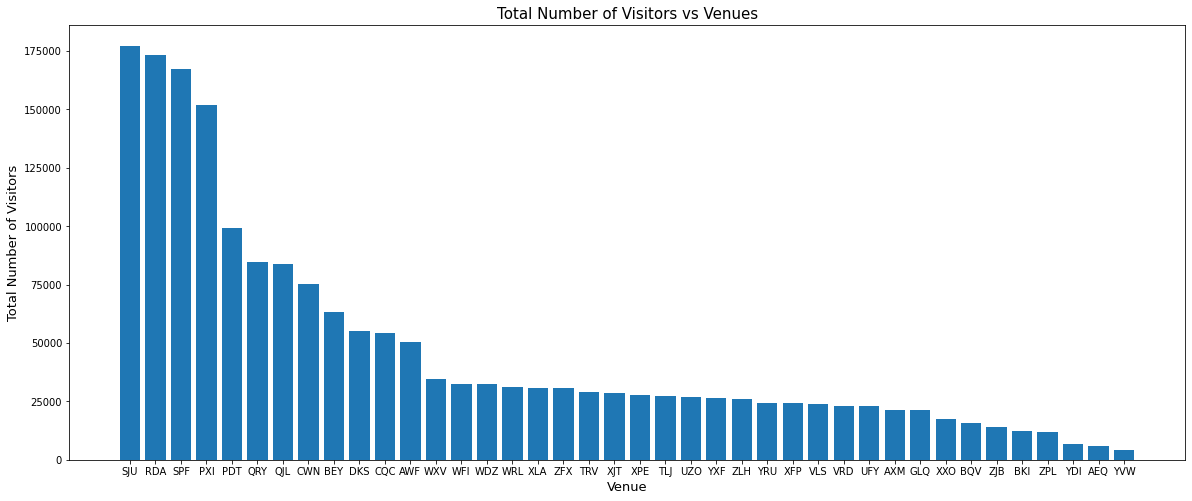

In [33]:
sum_visitors = daily_visitors.reindex(daily_visitors.sum().sort_values(ascending=False).index, axis=1) 

print('The top 20 total visitor venues')
print(sum_visitors.sum().head(20))

plt.figure(figsize=(20, 8))
x_pos = np.arange(len(sum_visitors.columns))
plt.bar(x_pos, sum_visitors.sum(), align='center')
plt.xticks(x_pos, sum_visitors.columns)
plt.xlabel('Venue', fontsize=13)
plt.ylabel('Total Number of Visitors', fontsize=13)
plt.title('Total Number of Visitors vs Venues', fontsize=15)

#plt.savefig('1. Total Number of Visitors.png', dpi=300, bbox_inches='tight')
#files.download('1. Total Number of Visitors.png')
plt.show()

I would like calculate and displaye the top 20 visitor venues, including the total number of visitors of each venue over the year using daily_visitors.sum() Then plotted the bar chart using plt.bar() of matplotlib library to show the total number of visitors over the year by sorting in order of decreasing visitor venues to explore and categorise the visitor data into sub groups.

In [34]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in daily_visitors.columns:
    total_visitors = daily_visitors[name].sum()
    if total_visitors > 100000:
        category = 0
    elif total_visitors > 50000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)
    print(name + ' venue has ' + categories[category] + ' volume of visitors')

for i in range(len(categories)):
    print('\n', categories[i] + '-volume Venues: ' + str(categories_selected[i]))

AWF venue has Medium volume of visitors
WFI venue has Low volume of visitors
SPF venue has High volume of visitors
CQC venue has Medium volume of visitors
TRV venue has Low volume of visitors
YXF venue has Low volume of visitors
WRL venue has Low volume of visitors
XJT venue has Low volume of visitors
BKI venue has Low volume of visitors
TLJ venue has Low volume of visitors
VRD venue has Low volume of visitors
XFP venue has Low volume of visitors
PDT venue has Medium volume of visitors
ZFX venue has Low volume of visitors
YRU venue has Low volume of visitors
WXV venue has Low volume of visitors
ZLH venue has Low volume of visitors
GLQ venue has Low volume of visitors
SJU venue has High volume of visitors
BQV venue has Low volume of visitors
DKS venue has Medium volume of visitors
CWN venue has Medium volume of visitors
VLS venue has Low volume of visitors
XXO venue has Low volume of visitors
BEY venue has Medium volume of visitors
YVW venue has Low volume of visitors
ZPL venue has Low 

According to the above bar chart, the venues can be clearly categorised into three groups, the high-volume venues have more than 100,000 visitors, the medium-volume venues have more than 50,000 visitors but less than or equal to 100,000 visitors, and the low-volume venues have fewer than or equal to 50,000 visitors. 

In [35]:
high_volume_venues = ['SJU', 'RDA', 'SPF', 'PXI']
medium_volume_venues = ['PDT', 'QRY', 'QJL', 'CWN', 'BEY', 'DKS', 'CQC', 'AWF']
low_volume_venues = ['WXV', 'WFI', 'WDZ', 'WRL', 'XLA', 'ZFX', 'TRV', 'XJT', 'XPE', 'TLJ', 'UZO', 'YXF', 'ZLH', 'YRU', 'XFP', 'VLS', 'VRD', 'UFY', 'AXM', 'GLQ', 'XXO', 'BQV', 'ZJB', 'BKI', 'ZPL', 'YDI', 'AEQ', 'YVW']
high_medium = high_volume_venues + medium_volume_venues

I created the groups of the high, medium, and low-volume venues and sorted the data by total number of visitors for each group in order to use them for other visualisaions. 'high_medium' is the group of high and medium volume.

### **Visualisation 2: The proportion of high-volume, medium-volume, and low-volume venues using pie chart**

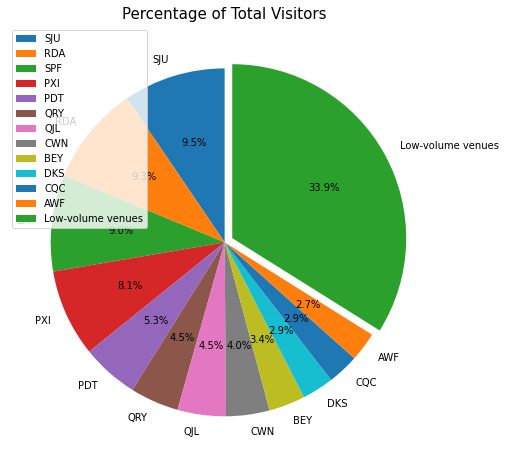

In [36]:
explodeList = []
selected = []
columns = sum_visitors.columns
sum_visitors['Low-volume venues'] = [0] * len(sum_visitors.index)

for name in columns:
    total_visitors = sum_visitors[name].sum()
    if total_visitors > 50000:
        selected.append(name)
        explodeList.append(0)
    else:
        sum_visitors['Low-volume venues'] += sum_visitors[name]

selected.append('Low-volume venues')
explodeList.append(0.05)

plt.figure(figsize=(8, 8))
plt.pie(sum_visitors[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Percentage of Total Visitors', fontsize=15)
plt.legend(loc=2)

plt.show()

I would like to show the proportion of totall visitors for each venue over the year. Therefore, I calculated and plotted the pie chart using plt.pie() of matplotlib library and sorted in order of decreasing visitor venues in order to explore the proportion of the high, medium, and low-volume venues. The visitors of the low-volume venues were grouped together in order to see the significance of the data.

### **Visualisation 3: The correlations of each venue using heatmap**

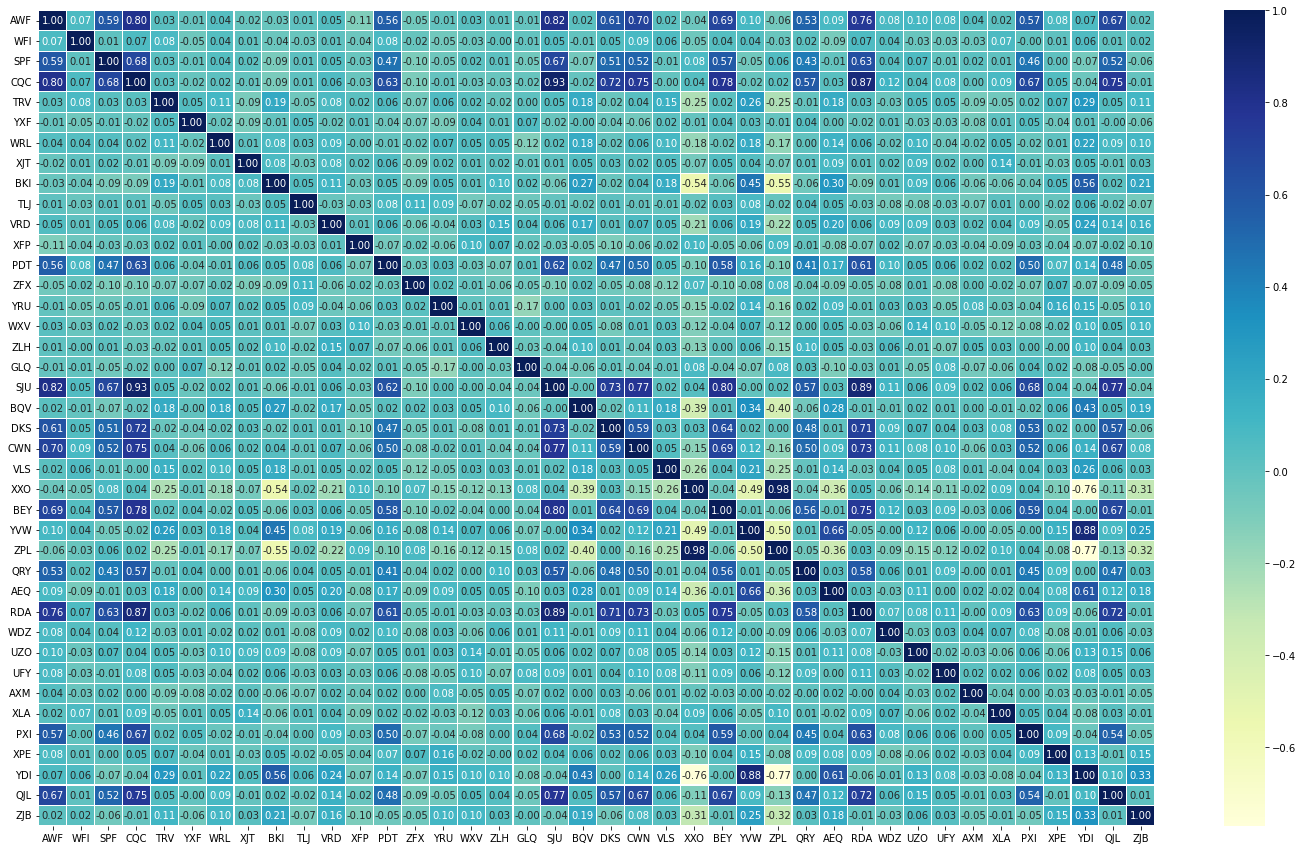

In [37]:
fig, ax = plt.subplots(figsize = (25,15))
sns.heatmap(daily_visitors.corr(), annot = True, fmt = '.2f', linewidths = 0.1, cmap = 'YlGnBu', cbar = True);
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

I would like to reveal the relationships between each venue. Therefore, I created the heatmap using sns.heatmap() of seaborn library to show the correlations of each venue because the company may use the relationships between each venue to analyse later on. The correlation coefficient were provided in order to show the strong correlations of the data. Using 'annot = True' to show the correlation coefficient in the heatmap.

### **Visualisation 4: The distribution of daily visitors at the high, medium, and low volume venues using histograms**


**The distribution of daily visitors at the high & medium volume venues**

81 bins


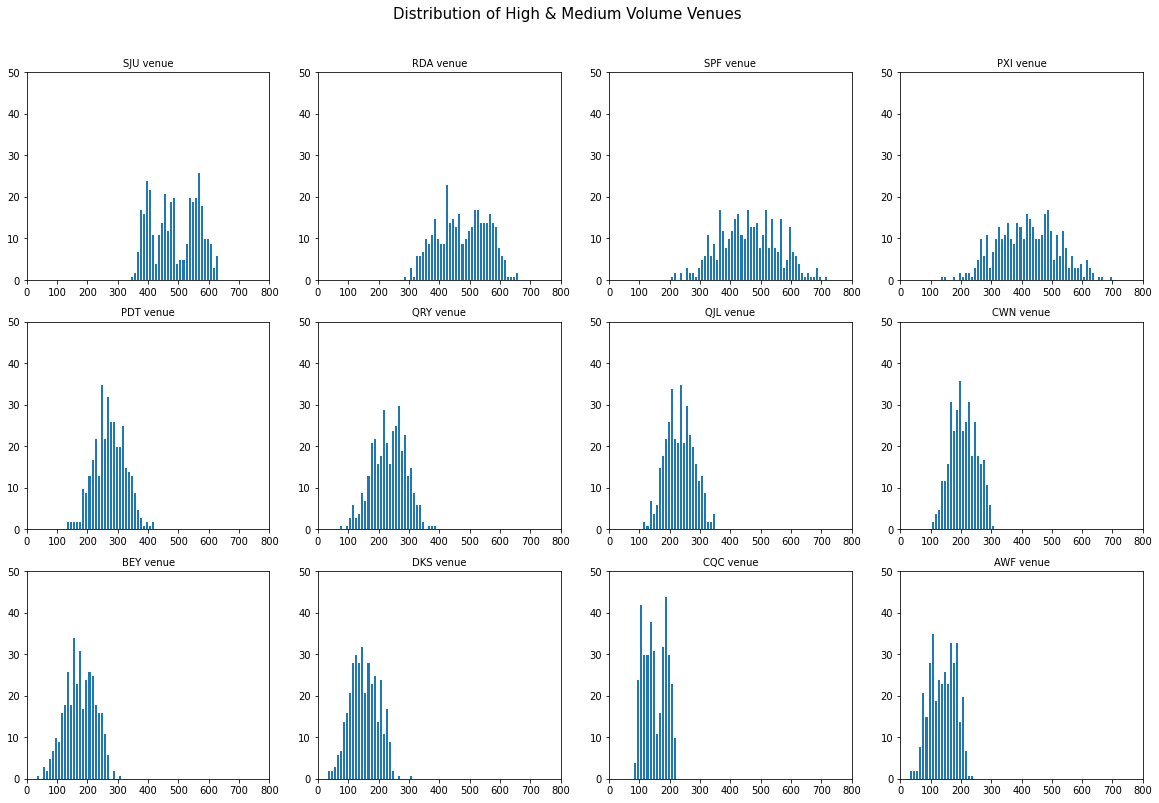

In [38]:
x_min = 0
x_max = 800
bin_width = 10

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(20, 13))
fig.suptitle('Distribution of High & Medium Volume Venues', fontsize=15, position=(0.5, 0.95))
counter = 1
for name in high_medium:
    sub = fig.add_subplot(3, 4, counter)
    sub.hist(daily_visitors[name], bins, edgecolor='w')
    sub.set_title(name + ' venue', fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=50)
    counter += 1

#plt.savefig('2. Distribution of High & Medium Volume Venues.png', dpi=300, bbox_inches='tight')
#files.download('2. Distribution of High & Medium Volume Venues.png')
plt.show()

I would like to show the company how the number of daily visitors were distributed for each venue in the high and medium volume venues. So, I created histrograms using the subplots sub.hist() with the same scales for the high and medium volume venues whereby each bin represents a range of daily visitors equal to 10 in order to explore how the number of daily visitors are distributed over the year and compare the daily visitor distributions of each venue in the high and medium volume.

**The distribution of daily visitors at the low-volume venues**



31 bins


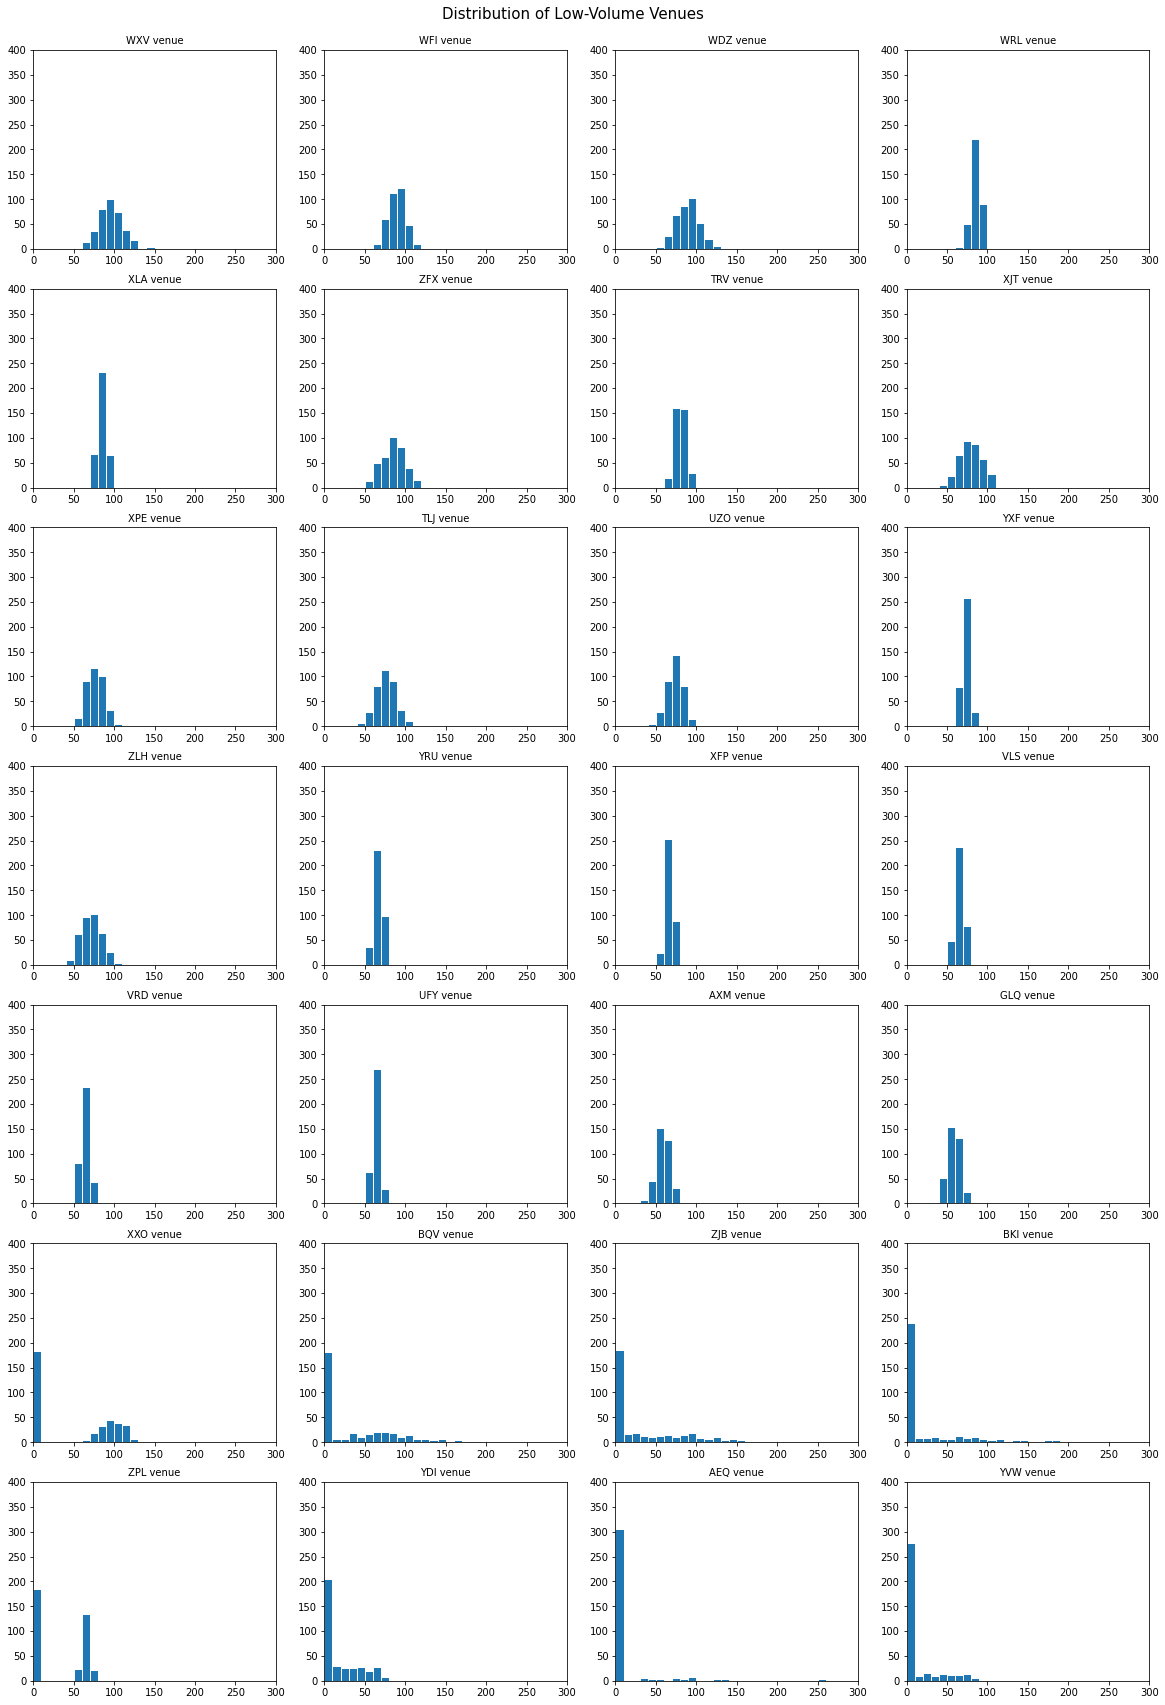

In [39]:
x_min = 0
x_max = 300
bin_width = 10

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

fig = plt.figure(figsize=(20, 30))
fig.suptitle('Distribution of Low-Volume Venues', fontsize=15, position=(0.5, 0.9))
counter = 1
for name in low_volume_venues:
    sub = fig.add_subplot(7, 4, counter)
    sub.hist(daily_visitors[name], bins, edgecolor='w')
    sub.set_title(name + ' venue', fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=400)
    counter += 1

plt.show()

Similar to the above plot, I created histrograms using the subplots sub.hist() with the same scales for the low-volume venues to explore how the number of daily visitors are distributed over the year and compare the daily visitor distributions of each venue, including anomalies in the data.


### **Visualisation 5: Daily visitors of each venue in the high and medium volume over the year using line plot with trendlines**

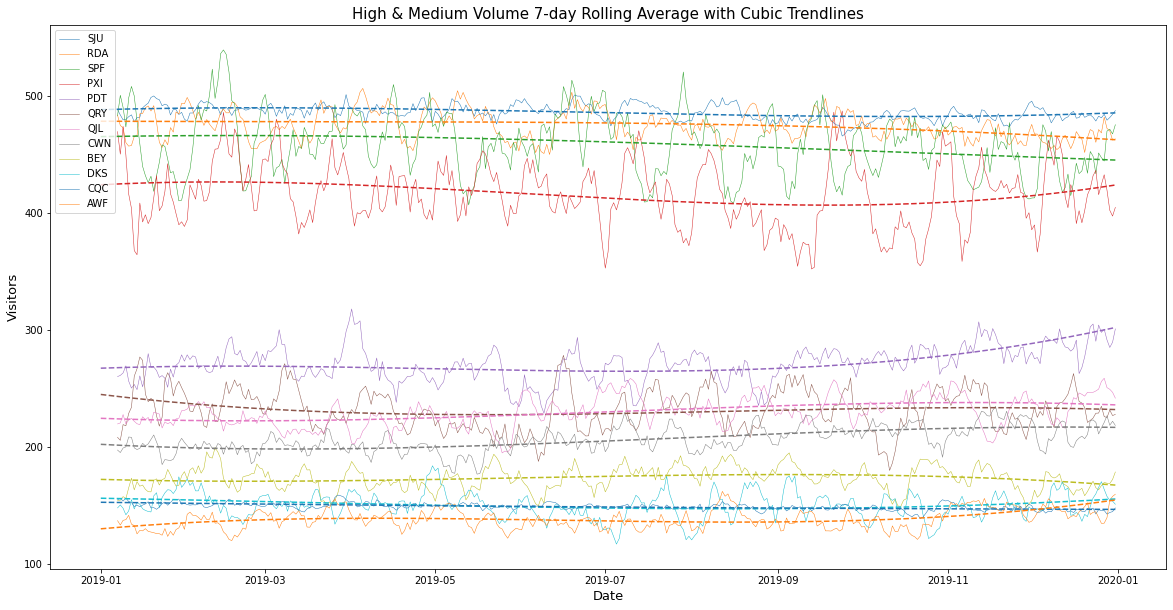

In [40]:
period = 7
rolling_average = daily_visitors.rolling(window=period).mean()

plt.figure(figsize=(20, 10))
plt.plot(rolling_average[high_medium], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in high_medium:
    x = np.arange(len(daily_visitors[name]))
    z = np.polyfit(x, daily_visitors[name], 3)
    trend = np.poly1d(z)
    plt.plot(daily_visitors.index, trend(x), linestyle='--')

plt.xlabel('Date', fontsize=13)
plt.ylabel('Visitors', fontsize=13)
plt.title('High & Medium Volume 7-day Rolling Average with Cubic Trendlines', fontsize=15)
plt.legend(high_medium, loc=2)

#plt.savefig('3. Total Number of Visitors with Trendlines.png', dpi=300, bbox_inches='tight')
#files.download('3. Total Number of Visitors with Trendlines.png')
plt.show()

I would like to reveal the daily-visitor trends and seasonal behaviour for each venue in the high and medium volume over the year. Therefore, I created the line plot using plt.plot() of matplotlib library to explore the daily visitors with 7-day rolling average. By using the avereages to eliminate some of the noise and created the curved trendlines using
polyfit() of NumPy library to display the trends of visitors at each venue because it is easy to identify some trends, peaks and troughs, or some anomalies such as where the data is not available.

### **Visualisation 6: Daily visitors of the low-volume venues over the year using area plot**

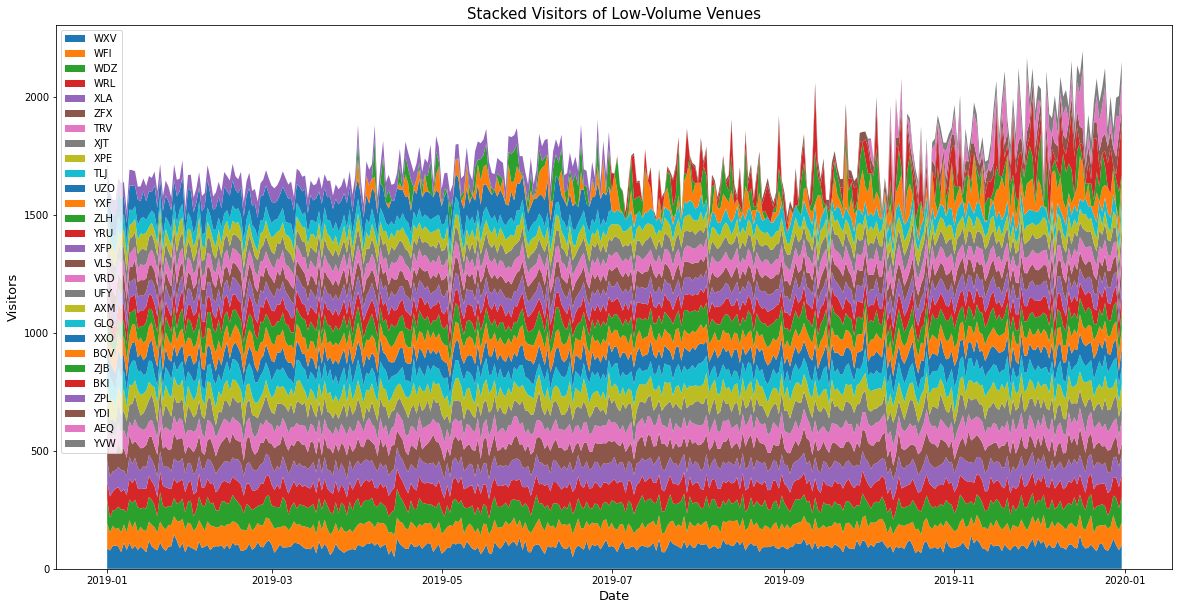

In [41]:
plt.figure(figsize=(20, 10))
plt.stackplot(daily_visitors[low_volume_venues].index, daily_visitors[low_volume_venues].transpose())
plt.xlabel('Date', fontsize=13) 
plt.ylabel('Visitors', fontsize=13) 
plt.title('Stacked Visitors of Low-Volume Venues',fontsize=15) 
plt.legend(daily_visitors[low_volume_venues].columns, loc=2) 
plt.show()

According to the distribution of daily visitors at the low-volume venues, there are some venues which have zero visitors. So, I created the area plot of the low-volume venues using plt.stackplot() of matplotlib library to explore the daily visitors if there are some anomalies in the data. We can see that there are some areas suddenly dropped down which mean there is no data available in those periods.

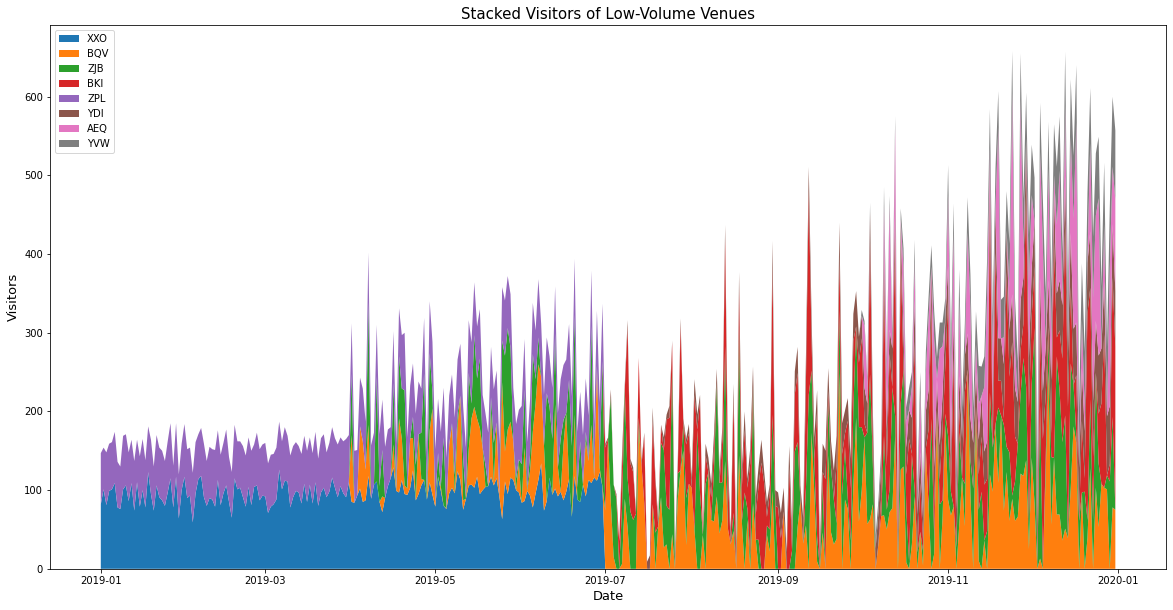

In [42]:
selected_low = ['XXO', 'BQV', 'ZJB', 'BKI', 'ZPL', 'YDI', 'AEQ', 'YVW']
plt.figure(figsize=(20, 10))
plt.stackplot(daily_visitors[selected_low].index, daily_visitors[selected_low].transpose())
plt.xlabel('Date', fontsize=13) 
plt.ylabel('Visitors', fontsize=13) 
plt.title('Stacked Visitors of Low-Volume Venues',fontsize=15) 
plt.legend(daily_visitors[selected_low].columns, loc=2)

#plt.savefig('4. Stacked visitors of low volume venues.png', dpi=300, bbox_inches='tight')
#files.download('4. Stacked visitors of low volume venues.png')
plt.show()

To make it clear, I would like to visual only 8 venues (XXO, BQV, ZJB, BKI, ZPL, YDI, AEQ, and YVW which have zero visitors in some periods) in order to explore and identify the new venues that opened during the year and the venues that the company has closed during 2019.

### **Visualisation 7: The interactive visualisation of daily visitors data using line plot**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
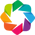

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [43]:
plot = daily_visitors.hvplot.line(
    frame_height=950, frame_width=1300,
    tools=['pan','poly_select', 'box_zoom', 'wheel_zoom','zoom_in', 'zoom_out', 'undo', 'redo', 'hover', 'save', 'reset'],
    xlabel='Date', ylabel='Daily Visitors',
    title='Daily Visitors of All Avenues')

hv.extension('bokeh')
plot

According to the visualisation 5, we cannot tell that which venue has the most daily visitors in 2019. So, I created the interactive visualisation using hvplot.line() from hvplot.pandas to display daily visitors for each venue over the year and allows the company to examine of the data on their own. The company can explore only venues that they are interested in by selecting the venue from the variable legend at beside the plot. Moreover, the company can also use the interactive tools at beside the plot to explore the data as follows:
*   Pan: To pan or move the plot by left-dragging a mouse
*   Box Zoom: To zoom and explore only the rectangular area that they are interested in
*   Wheel Zoom: To zoom the plot in and out, centering on the current mouse location.
*   Poly Select: To select the arbitrary polygonal area that they are interested in
*   Save: To save the .png image to the local computer
*   Reset: To reset the visualisation to the original visualisation
*   Zoom In: To increase the zoom level of the visualisation
*   Zoom Out: To decrease the zoom level of the visualisation
*   Undo: To restore the previous state of the visualisation
*   Redo: To reverse the last state which performed by the undo tool
*   Hover: To displays the annotations of each data point




### **Visualisation 8: The interactive visualisations of daily visitors on the dashboard**



In [44]:
def get_line_plot(volume, window_size, date_range):
    if volume == 'high':
        venues = ['SPF', 'SJU', 'RDA', 'PXI']
    elif volume == 'medium':
        venues = ['AWF', 'CQC', 'PDT', 'DKS', 'CWN', 'BEY', 'QRY', 'QJL']
    else:
        venues = low_volume_venues

    df = daily_visitors[venues]
    df = df.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])]
    df = df.rolling(window=window_size).mean()
    return df.hvplot.line(frame_height=800, frame_width=1100, grid=True, 
                          tools=['pan','poly_select', 'box_zoom', 'wheel_zoom','zoom_in', 'zoom_out', 'undo', 'redo', 'hover', 'save', 'reset'])


time_title = '### Time-Series'

volumes = ['high', 'medium', 'low']

volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(daily_visitors.index[0], daily_visitors.index[-1]),
                                        start=daily_visitors.index[0], end=daily_visitors.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    get_line_plot(volume.options[0], day_avg.value, time_date_range.value)
    )

def update_time_row(event):
    time_row[1].object = get_line_plot(volume.value, day_avg.value, time_date_range.value)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', 'low'], value='high', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(NdOverlay)

The company might find it is difficult if they want to select only the medium-volume venues or the low-volume venues or any periods of the data. Therefore, I created the interactive visualisation in the dashboard using line plots to display and allows the company to examine of the data on their own. I created the panel dashboard using hvplot.scatter() from hvplot.pandas and pn.widgets.Select() of panel library in order to allows the company analyse the data more easily, including seasonal behaviour. The company also can explore only venues that they are interested in by selecting the venue from the variable legend at beside the plot. The chart will be changed according to what the widgets are set to by the company as follows: 
* Volume: High-volume venues, medium-volume venues, and low-volume venues
* Day average: The number of rolling average
* Dates: The data period that the company want to observe 

Moreover, the company also can use the interactive tools at beside the plot as follows:
*   Pan: To pan or move the plot by left-dragging a mouse
*   Box Zoom: To zoom and explore only the rectangular area that they are interested in
*   Wheel Zoom: To zoom the plot in and out, centering on the current mouse location.
*   Poly Select: To select the arbitrary polygonal area that they are interested in
*   Save: To save the .png image to the local computer
*   Reset: To reset the visualisation to the original visualisation
*   Zoom In: To increase the zoom level of the visualisation
*   Zoom Out: To decrease the zoom level of the visualisation
*   Undo: To restore the previous state of the visualisation
*   Redo: To reverse the last state which performed by the undo tool
*   Hover: To displays the annotations of each data point

### **Explore more datasets and create the new dataframe** 





In [45]:
avg_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueAge.csv', index_col=0)
max_distance = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueDistance.csv', index_col=0)
time_spent = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueDuration.csv', index_col=0)
female_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueGender.csv', index_col=0)
average_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001177891/VenueSpend.csv', index_col=0)

**Read in the data**
*   avg_age: The average age of visitors at each venue
*   max_distance: The maximum distance (miles) that visitors have travelled to each venue
*   time_spent: The average time (mins) that visitors spend at each venue
*   female_visitors: The percentage of visitors identifying as female at each venue
*   average_spend: The average spend (£) by visitors at each venue

In [46]:
summary_data = pd.DataFrame(index=daily_visitors.columns)

summary_data['Total Visitors'] = daily_visitors.sum().values
summary_data['Average Age'] = avg_age.values
summary_data['Maximum Distance (miles)'] = max_distance.values
summary_data['Time Spent (mins)'] = time_spent.values
summary_data['Female Visitors (%)'] = female_visitors.values
summary_data['Average Spending (£)'] = average_spend.values

variables = list(summary_data.columns)

pd.set_option('display.max_columns', None)
display(summary_data)
print(summary_data.describe())

Total Visitors  Average Age  Maximum Distance (miles)  Time Spent (mins)  \
AWF           50645           22                        20                109   
WFI           32487           23                        13                 95   
SPF          167397           49                        63                101   
CQC           54434           22                        22                106   
TRV           29036           42                         8                146   
YXF           26651           32                         6                 84   
WRL           31202           22                        15                118   
XJT           28786           24                         5                115   
BKI           12288           22                         4                 91   
TLJ           27502           42                        11                 71   
VRD           23180           32                         5                113   
XFP           24150           54                         6                 91   
PDT           99057           55                        20                 91   
ZFX           30835           30                        13                108   
YRU           24272           41                         8                 88   
WXV           34650           53                        15                110   
ZLH           25833           49                        11                 74   
GLQ           21185           37                         7                108   
SJU          177317           22                        74                118   
BQV           15657           23                         6                 60   
DKS           54973           53                         9                 78   
CWN           75423           30                        32                119   
VLS           23914           24                         4                 79   
XXO           17568           30                         7                101   
BEY           63260           36                        24                143   
YVW            4294           27                         1                 87   
ZPL           11695           40                         3                 81   
QRY           84617           29                        37                108   
AEQ            6035           49                         2                 86   
RDA          173194           25                        43                117   
WDZ           32395           43                         8                102   
UZO           26843           36                         6                 95   
UFY           23175           25                         6                 64   
AXM           21292           46                         4                 76   
XLA           30841           49                         8                101   
PXI          151907           41                        66                114   
XPE           27657           49                         9                 82   
YDI            6679           40                         3                107   
QJL           84004           34                        26                 97   
ZJB           14018           25                         6                101   

     Female Visitors (%)  Average Spending (£)  
AWF                   60                    10  
WFI                   44                    12  
SPF                   44                    35  
CQC                   53                     8  
TRV                   57                    27  
YXF                   43                    21  
WRL                   59                    14  
XJT                   52                    13  
BKI                   55                    16  
TLJ                   42                    21  
VRD                   58                    19  
XFP                   46                    31  
PDT                   53                    37

       Total Visitors  Average Age  Maximum Distance (miles)  \
count       40.000000    40.000000                 40.000000   
mean     46758.700000    35.675000                 15.900000   
std      46321.020509    10.920194                 17.794842   
min       4294.000000    22.000000                  1.000000   
25%      22704.250000    25.000000                  6.000000   
50%      28221.500000    35.000000                  8.000000   
75%      54568.750000    43.750000                 20.000000   
max     177317.000000    55.000000                 74.000000   

       Time Spent (mins)  Female Visitors (%)  Average Spending (£)  
count          40.000000            40.000000              40.00000  
mean           98.375000            49.450000              21.00000  
std            18.864819             5.948281               8.25864  
min            60.000000            41.000000               8.00000  
25%            85.500000            43.750000              13.75000  
50%

There are more 5 datasets which were given by the company. Therefore, I used all datasets to create and display the new dataframe of daily visitors data and all attributes of ChrisCo fictional company using pd.DataFrame() of Pandas library and calculated some basic statistical analysis such as average, minimum, maximum of each attribute, etc, using the .describe() function to explore the details for each attribute.

### **Visualisation 9: The comparison of all attributes of high and medium volume venues using bar chart**

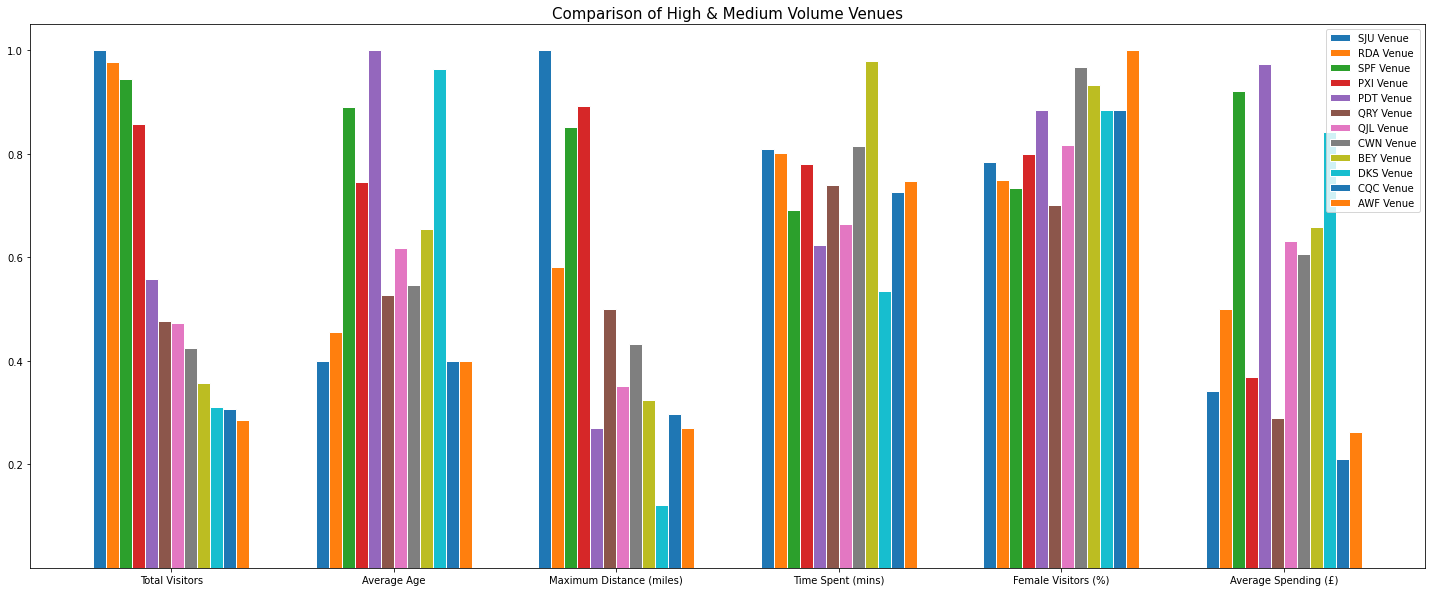

In [47]:
normalised_data = summary_data / summary_data.max()

plt.figure(figsize=(25, 10))
c = 0
n_bars = len(high_medium)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.7 / n_bars
for name in high_medium:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, width=bar_width, edgecolor='white', label=name+' Venue')
    c += 1

plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.title('Comparison of High & Medium Volume Venues', fontsize=15)
plt.legend()

#plt.savefig('6. Comparison of high & medium volume venues.png', dpi=300, bbox_inches='tight')
#files.download('6. Comparison of high & medium volume venues.png')

plt.show()

I created the bar plots using plt.bar() of matplotlib library to compare all attributes in the high and medium volume venues. The first 4 bars of each attribute represent the data of high-volume venues and the rest represent the data of medium-volume venues with different colours of the bars. Normalisation technique was applied to use the same scale between 0 and 1 in the chart.

### **Visualisation 10: The correlations between all attributes**



**Heatmap**

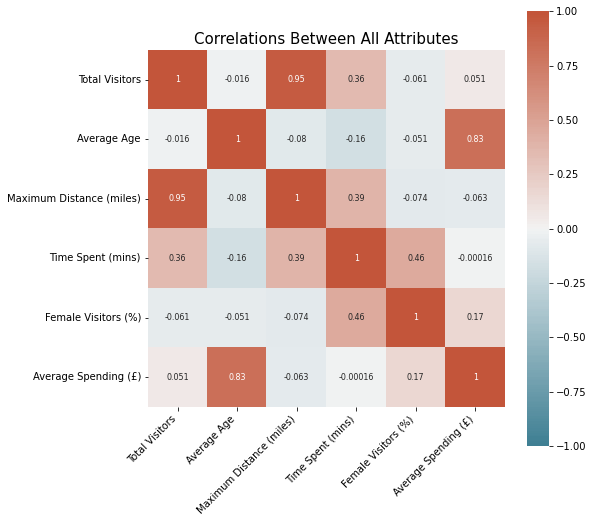

In [48]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations Between All Attributes', fontsize=15)

plt.show()

I created the heatmap using sns.heatmap() of seaborn library to explore the correlations between all attributes (Total visitors, Average age, Maximum distance, Spend time, Female visitors, and Average spending) with the correlation coefficient in order to show the strong correlations between all attributes. Using 'annot = True' to show the correlation coefficient in the heatmap.

**Correlogram of all attributes with linear regression**


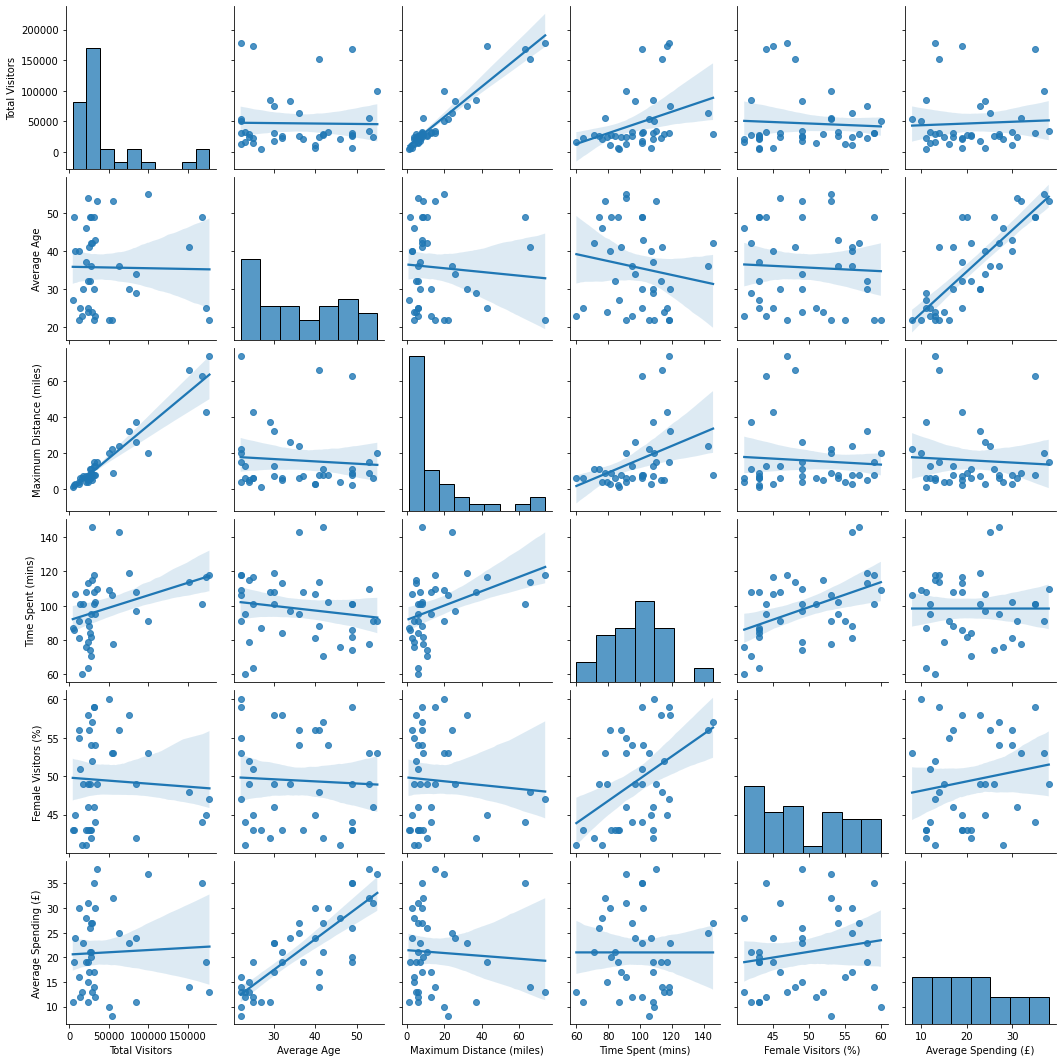

In [49]:
sns.pairplot(summary_data, kind='reg')           

#plt.savefig('7. Correlations between all attributes.png', dpi=300, bbox_inches='tight')
#files.download('7. Correlations between all attributes.png')
plt.show()


I created the correlogram with linear regression using sns.pairplot() of seaborn library to show the correlations between all attributes and used the histograms to see how variables distributed because it is more useful to show the variable's distribution, rather than the correlation of variables with itself. Using kind='reg' to generate the linear regression for each plot.

### **Visualisation 11: The Scatter plots of two strong correlations and interactive visualisation on the dashboard**



**The scatter plot between Total visitors and Maximum distance (miles)**

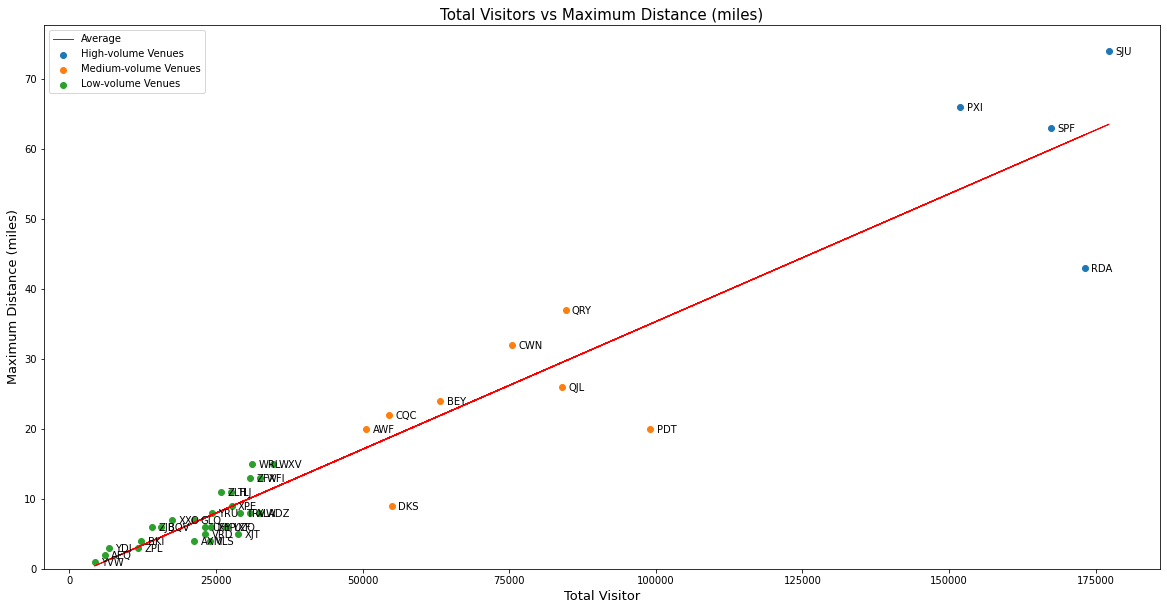

In [50]:
summary_data_high = summary_data.loc[daily_visitors.sum() > 100000]
summary_data_medium = summary_data.loc[(daily_visitors.sum() > 50000) & (daily_visitors.sum() <= 100000)]
summary_data_low = summary_data.loc[daily_visitors.sum() <= 50000]

plt.figure(figsize=(20, 10))
plt.scatter(summary_data_high['Total Visitors'], summary_data_high['Maximum Distance (miles)'])
plt.scatter(summary_data_medium['Total Visitors'], summary_data_medium['Maximum Distance (miles)'])
plt.scatter(summary_data_low['Total Visitors'], summary_data_low['Maximum Distance (miles)'])

for i, name in enumerate(daily_visitors.columns):
    plt.annotate(name, (summary_data['Total Visitors'][i]+1100, summary_data['Maximum Distance (miles)'][i]-0.65))

z = np.polyfit(summary_data['Total Visitors'], summary_data['Maximum Distance (miles)'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Total Visitors'], trend(summary_data['Total Visitors']), 'r-', linewidth=1)

plt.ylim(ymin=0)
plt.title('Total Visitors vs Maximum Distance (miles)', fontsize=15)
plt.xlabel('Total Visitor', fontsize=13)
plt.ylabel('Maximum Distance (miles)', fontsize=13)
plt.legend(['Average', 'High-volume Venues', 'Medium-volume Venues', 'Low-volume Venues'], loc=2)

plt.show()

According to the correlogram, we knew that there are two strong correlations. So, I created scatter plots using plt.scatter() of matplotlib library to display the relationships between the data of total visitors and maximum distance (miles) with the linear regression using polyfit() of NumPy library to show the average. Moreover, I used the different colours to represent the high, medium, and low-volume venues.

**The scatter plot of Average age & Average spending (£)**

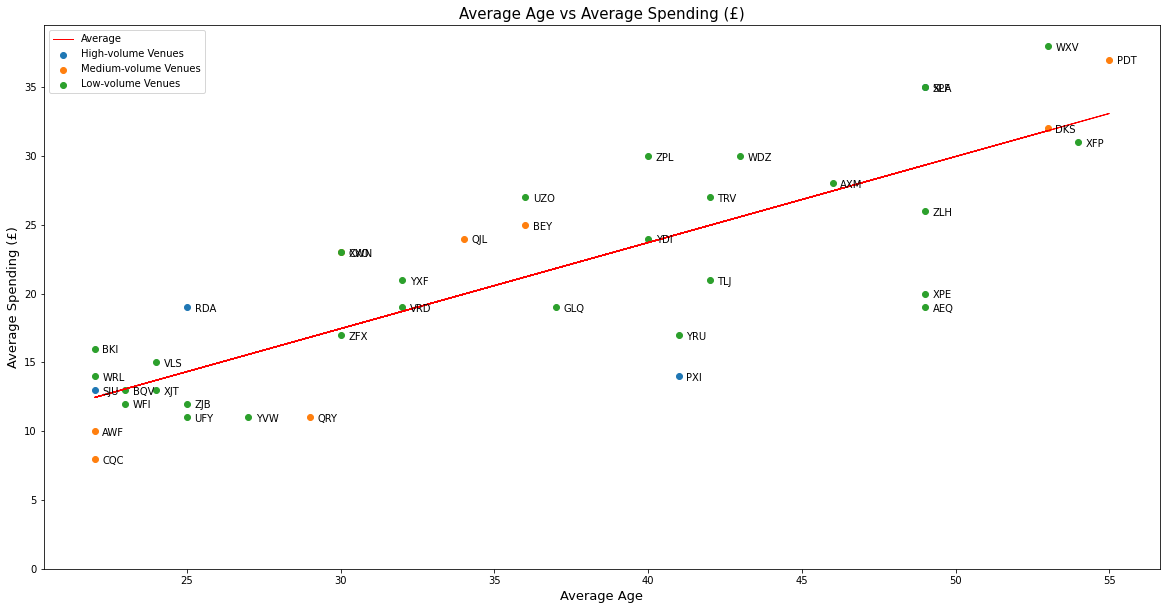

In [51]:
summary_data_high = summary_data.loc[daily_visitors.sum() > 100000]
summary_data_medium = summary_data.loc[(daily_visitors.sum() > 50000) & (daily_visitors.sum() <= 100000)]
summary_data_low = summary_data.loc[daily_visitors.sum() <= 50000]

plt.figure(figsize=(20, 10))
plt.scatter(summary_data_high['Average Age'], summary_data_high['Average Spending (£)'])
plt.scatter(summary_data_medium['Average Age'], summary_data_medium['Average Spending (£)'])
plt.scatter(summary_data_low['Average Age'], summary_data_low['Average Spending (£)'])

for i, name in enumerate(daily_visitors.columns):
    plt.annotate(name, (summary_data['Average Age'][i]+0.25, summary_data['Average Spending (£)'][i]-0.35))

z = np.polyfit(summary_data['Average Age'], summary_data['Average Spending (£)'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Average Age'], trend(summary_data['Average Age']), 'r-', linewidth=1)

plt.ylim(ymin=0)
plt.title('Average Age vs Average Spending (£)', fontsize=15)
plt.xlabel('Average Age', fontsize=13)
plt.ylabel('Average Spending (£)', fontsize=13)
plt.legend(['Average', 'High-volume Venues', 'Medium-volume Venues', 'Low-volume Venues'], loc=2)
plt.show()

Another stong correlations is between average age and average spending (£). I created scatter plots using plt.scatter() of matplotlib library to display the relationships between the data of average age and average spending (£) with the linear regression using polyfit() of NumPy library to show the average. I also used the different colours to represent the high, medium, and low-volume venues.

### **Visualisation 12: The interactive visualisation of all attributes using bubble plot on the dashboard**

In [52]:
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    summary_data['BubbleSize'] = summary_data[variable_z] / summary_data[variable_z].max() * math.exp(bubble_scaling)
    return summary_data.hvplot.scatter(frame_height=500, frame_width=500,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       tools=['poly_select','zoom_in', 'zoom_out', 'undo', 'redo', 'hover'],
                                       x=variable_x, y=variable_y, size='BubbleSize')
    
variables_title = '## Variables'

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=300)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=300)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=300)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=300)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
    )

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['Total Visitors', ...], value='Total Visitors', width=300)
        [2] Select(name='Y-axis', options=['Total Visitors', ...], value='Average Age', width=300)
        [3] Select(name='Bubble', options=['Total Visitors', ...], value='Maximum Distance (..., width=300)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=300)
    [1] HoloViews(Scatter)

The company might be interested in other correlations in the data. So, I created interactive visualisation using bubble plots to display and allows the company to examine of the data on their own. In order to allow the company to have a fully exploration in the data, I decided to create the panel dashboard using hvplot.scatter() from hvplot.pandas and pn.widgets.Select() of panel library.

Similar to the interative visualisation, this dashboard allows the company to control the widgets and select the attributes (Total visitors, Average age, Maximum distance, Spend time, Female visitors, and Average spending) that they want to see the correlations. They can select the three variables for for X-axis, Y-axis, and Bubble, that they want to analysis on the bubble plot. Bubble scaling will be used to control the bubble size according to the data. Moreover, the company can also use the interactive tools at beside the plot as follows:
*   Pan: To pan or move the plot by left-dragging a mouse
*   Box Zoom: To zoom and explore only the rectangular area that they are interested in
*   Wheel Zoom: To zoom the plot in and out, centering on the current mouse location.
*   Poly Select: To select the arbitrary polygonal area that they are interested in
*   Save: To save the .png image to the local computer
*   Reset: To reset the visualisation to the original visualisation
*   Zoom In: To increase the zoom level of the visualisation
*   Zoom Out: To decrease the zoom level of the visualisation
*   Undo: To restore the previous state of the visualisation
*   Redo: To reverse the last state which performed by the undo tool
*   Hover: To displays the annotations of each data point

### **Extra interactive visualisation: The boxplot using plotly library to show the statistical values of each attributes**

In [53]:
box1 = go.Box(y = summary_data['Average Age'], name = 'Average Age')
box2 = go.Box(y = summary_data['Maximum Distance (miles)'], name = 'Maximum Distance (miles)')
box3 = go.Box(y = summary_data['Time Spent (mins)'], name = 'Time Spent (mins)')
box4 = go.Box(y = summary_data['Female Visitors (%)'], name = 'Female Visitors (%)')
box5 = go.Box(y = summary_data['Average Spending (£)'], name = 'Average Spending (£)')

data_boxplot = [box1, box2, box3, box4, box5]
iplot(data_boxplot)

In order to allow the company to investigate and analyse the statistical values for each attribute in the dataset, I created the interactive visualisation (boxplot) using go.Box of Plotly library to show the maximum, minimum, medium, etc. of the data.